In [1]:
import pandas as pd
import numpy as np
import ast
from geopy.distance import geodesic
import polyline
import json
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import copy
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

In [2]:
df = pd.read_csv('/home/smebellis/ece5831_final_project/processed_data/clustered_dataset.csv') 
sampled_df = df.sample(n=1000, random_state=42)

In [3]:
# Features and target
X = df[['WEEKDAY', 'TIME_PERIODS', 'DISTRICT_CLUSTER']]
y = df['TRAFFIC_STATUS']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [4]:
# Initialize encoders
le_traffic = LabelEncoder()
oe_features = OrdinalEncoder()

# Encoding Target Variable
y_train = le_traffic.fit_transform(y_train)
y_test = le_traffic.transform(y_test)

# Selecting the feature columns to encode
feature_columns = ['WEEKDAY', 'TIME_PERIODS', 'DISTRICT_CLUSTER']

# Fit and transform on training data
X_train[feature_columns] = oe_features.fit_transform(X_train[feature_columns])

# Transform on test data
X_test[feature_columns] = oe_features.transform(X_test[feature_columns])

In [5]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [6]:
params = {
    'objective': 'reg:logistic',
    'max_depth': 6,  # You can tune this hyperparameter
    'eta': 0.1,      # Learning rate, can be tuned
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse'
}

In [7]:
# Ensure labels are binary (0 or 1)
y_train_binary = (y_train > 0).astype(int)
y_test_binary = (y_test > 0).astype(int)

dtrain = xgb.DMatrix(X_train, label=y_train_binary)
dtest = xgb.DMatrix(X_test, label=y_test_binary)

evals = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.train(params, dtrain, num_boost_round=1000, evals=evals, early_stopping_rounds=10)


[0]	train-rmse:0.49647	eval-rmse:0.49652
[1]	train-rmse:0.49619	eval-rmse:0.49624
[2]	train-rmse:0.49595	eval-rmse:0.49601
[3]	train-rmse:0.49432	eval-rmse:0.49439
[4]	train-rmse:0.49297	eval-rmse:0.49306
[5]	train-rmse:0.49282	eval-rmse:0.49291
[6]	train-rmse:0.49173	eval-rmse:0.49184
[7]	train-rmse:0.49163	eval-rmse:0.49173
[8]	train-rmse:0.49154	eval-rmse:0.49165
[9]	train-rmse:0.49068	eval-rmse:0.49080
[10]	train-rmse:0.48999	eval-rmse:0.49012
[11]	train-rmse:0.48943	eval-rmse:0.48956
[12]	train-rmse:0.48897	eval-rmse:0.48911
[13]	train-rmse:0.48858	eval-rmse:0.48874
[14]	train-rmse:0.48827	eval-rmse:0.48843
[15]	train-rmse:0.48801	eval-rmse:0.48819
[16]	train-rmse:0.48781	eval-rmse:0.48798
[17]	train-rmse:0.48764	eval-rmse:0.48782
[18]	train-rmse:0.48750	eval-rmse:0.48769
[19]	train-rmse:0.48748	eval-rmse:0.48767
[20]	train-rmse:0.48737	eval-rmse:0.48756
[21]	train-rmse:0.48728	eval-rmse:0.48748
[22]	train-rmse:0.48720	eval-rmse:0.48741
[23]	train-rmse:0.48715	eval-rmse:0.48735
[2

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

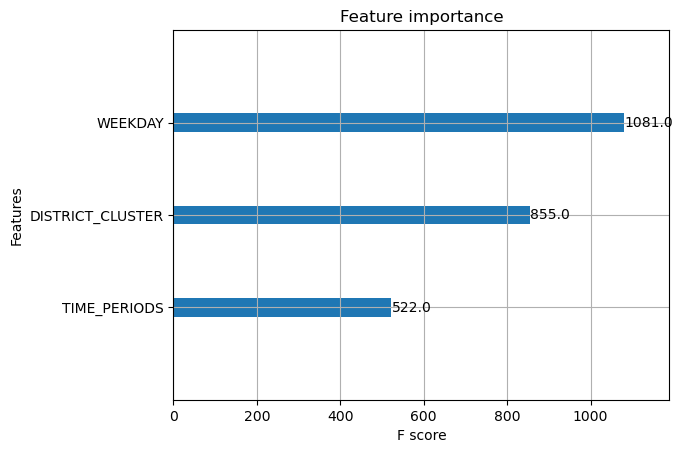

In [8]:
xgb.plot_importance(model)